# Airline/Flight Delay Prediction

Download link= https://www.kaggle.com/datasets/mrferozi/flight-delays?select=flight.csv

This dataset was downloaded from the US Department of transport website. This website holds both schedule and actual departure and arrival times.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('flight.csv')
df

,Year,Month,Day,DayOfWeek,Flight_Date,UniqueCarrier,Tai_lNum,FlightNum,Origin_Airport,Origin_City_Name,...,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Top_Carriers,Top_Origin,DEPTIME_GROUP1,DEPTIME_GROUP2,DEPTIME_GROUP3
0,2016,7,1,5,01/07/2016,AA,N793AA,1,BOS,"Boston, MA",...,0,0,0,0,0,1,1,0000-0600,0400-0600,0500-0600
1,2016,7,2,6,02/07/2016,AA,N784AA,1,BOS,"Boston, MA",...,0,0,0,0,0,1,1,0000-0600,0400-0600,0500-0600
2,2016,7,4,1,04/07/2016,AA,N785AA,1,BOS,"Boston, MA",...,0,0,0,0,0,1,1,0600-1200,0600-0800,0600-0700
3,2016,7,5,2,05/07/2016,AA,N790AA,1,BOS,"Boston, MA",...,0,0,0,0,0,1,1,0000-0600,0400-0600,0500-0600
4,2016,7,6,3,06/07/2016,AA,N799AA,1,BOS,"Boston, MA",...,0,0,0,0,0,1,1,0000-0600,0400-0600,0500-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,2016,7,21,4,21/07/2016,AA,N892AA,146,LAX,"Los Angeles, CA",...,30,0,6,0,0,1,1,0600-1200,0800-1000,0800-0900
4817,2016,7,22,5,22/07/2016,AA,N855AA,146,LAX,"Los Angeles, CA",...,0,0,0,0,0,1,1,0600-1200,0800-1000,0800-0900
4818,2016,7,24,7,24/07/2016,AA,N3AVAA,146,LAX,"Los Angeles, CA",...,0,0,0,0,0,1,1,0600-1200,0800-1000,0800-0900
4819,2016,7,25,1,25/07/2016,AA,N886AA,146,LAX,"Los Angeles, CA",...,0,0,17,0,0,1,1,0600-1200,0800-1000,0800-0900


## 1. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 4821 non-null   int64 
 1   Month                4821 non-null   int64 
 2   Day                  4821 non-null   int64 
 3   DayOfWeek            4821 non-null   int64 
 4   Flight_Date          4821 non-null   object
 5   UniqueCarrier        4821 non-null   object
 6   Tai_lNum             4821 non-null   object
 7   FlightNum            4821 non-null   int64 
 8   Origin_Airport       4821 non-null   object
 9   Origin_City_Name     4821 non-null   object
 10  Origin_State         4821 non-null   object
 11  Scheduled_Departure  4821 non-null   int64 
 12  Departure_Time       4821 non-null   int64 
 13  Dep_Delay            4821 non-null   int64 
 14  DepDel15             4821 non-null   int64 
 15  Dep_Delay_Groups     4821 non-null   int64 
 16  Schedu

## 2. Check how many number of rows and columns are present in the dataset.

In [4]:
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 4821
Number of Columns: 35


## 3. Check if null values are there or not.

In [5]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
DayOfWeek              0
Flight_Date            0
UniqueCarrier          0
Tai_lNum               0
FlightNum              0
Origin_Airport         0
Origin_City_Name       0
Origin_State           0
Scheduled_Departure    0
Departure_Time         0
Dep_Delay              0
DepDel15               0
Dep_Delay_Groups       0
Scheduled_Arrival      0
Arrival_Time           0
Arrival_Delay          0
Arr_Delay_Minutes      0
Arr_Del_morethan15     0
Cancelled              0
Diverted               0
Distance               0
DistanceGroup          0
Carrier_Delay          0
WeatherDelay           0
NAS_Delay              0
Security_Delay         0
Late_Aircraft_Delay    0
Top_Carriers           0
Top_Origin             0
DEPTIME_GROUP1         0
DEPTIME_GROUP2         0
DEPTIME_GROUP3         0
dtype: int64

In [6]:
df.isna().any()

Year                   False
Month                  False
Day                    False
DayOfWeek              False
Flight_Date            False
UniqueCarrier          False
Tai_lNum               False
FlightNum              False
Origin_Airport         False
Origin_City_Name       False
Origin_State           False
Scheduled_Departure    False
Departure_Time         False
Dep_Delay              False
DepDel15               False
Dep_Delay_Groups       False
Scheduled_Arrival      False
Arrival_Time           False
Arrival_Delay          False
Arr_Delay_Minutes      False
Arr_Del_morethan15     False
Cancelled              False
Diverted               False
Distance               False
DistanceGroup          False
Carrier_Delay          False
WeatherDelay           False
NAS_Delay              False
Security_Delay         False
Late_Aircraft_Delay    False
Top_Carriers           False
Top_Origin             False
DEPTIME_GROUP1         False
DEPTIME_GROUP2         False
DEPTIME_GROUP3

### This dataset is not having NaN or missing values. So we can perform analysis of numerical columns and categorical columns.

## 4. Check how many number of numerical columns are there in the dataset

In [7]:
num_col=df.select_dtypes(include=['int64','float64']).columns
print(num_col)
print("Total number of numeric columns: ",num_col.shape[0])

Index(['Year', 'Month', 'Day', 'DayOfWeek', 'FlightNum', 'Scheduled_Departure',
       'Departure_Time', 'Dep_Delay', 'DepDel15', 'Dep_Delay_Groups',
       'Scheduled_Arrival', 'Arrival_Time', 'Arrival_Delay',
       'Arr_Delay_Minutes', 'Arr_Del_morethan15', 'Cancelled', 'Diverted',
       'Distance', 'DistanceGroup', 'Carrier_Delay', 'WeatherDelay',
       'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay', 'Top_Carriers',
       'Top_Origin'],
      dtype='object')
Total number of numeric columns:  26


In [8]:
num_df=df.select_dtypes(include=['int64','float64'])
num_df

,Year,Month,Day,DayOfWeek,FlightNum,Scheduled_Departure,Departure_Time,Dep_Delay,DepDel15,Dep_Delay_Groups,...,Diverted,Distance,DistanceGroup,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Top_Carriers,Top_Origin
0,2016,7,1,5,1,600,554,-6,0,-1,...,0,187,1,0,0,0,0,0,1,1
1,2016,7,2,6,1,600,554,-6,0,-1,...,0,187,1,0,0,0,0,0,1,1
2,2016,7,4,1,1,600,601,1,0,0,...,0,187,1,0,0,0,0,0,1,1
3,2016,7,5,2,1,600,556,-4,0,-1,...,0,187,1,0,0,0,0,0,1,1
4,2016,7,6,3,1,600,552,-8,0,-1,...,0,187,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,2016,7,21,4,146,815,845,30,1,2,...,0,2611,11,30,0,6,0,0,1,1
4817,2016,7,22,5,146,815,811,-4,0,-1,...,0,2611,11,0,0,0,0,0,1,1
4818,2016,7,24,7,146,815,809,-6,0,-1,...,0,2611,11,0,0,0,0,0,1,1
4819,2016,7,25,1,146,815,811,-4,0,-1,...,0,2611,11,0,0,17,0,0,1,1


Lets see data records and on the basis of that we will delete columns if a particular column is not useful for analysis.

In [9]:
print('DepDel15: \n',df['DepDel15'].unique()) # it only gives record of departure flights which are delayed by 15 mins. it is similar to deptdelay so we dont need extra column. 
print('Dep_Delay_Groups: \n',df['Dep_Delay_Groups'].unique()) # it gives some departure delayed time in groups which is not important for analysis.
print('Arr_Del_morethan15: \n',df['Arr_Del_morethan15'].unique()) # it only gives record of arrival flights which are delayed by 15 mins. it is similar to arrivaldelay so we dont need extra column.
print('Arrival_Delay: \n',df['Arrival_Delay'].unique()) # 'arrival delay minutes' column is same and more informative rather than this column so we dont need this.
print('Cancelled: \n',df['Cancelled'].unique()) # it gives only 0 value and its unuseful for analysis
print('Diverted: \n',df['Diverted'].unique()) # it gives only 0 value and its unuseful for analysis
print('DistanceGroup: \n',df['DistanceGroup'].unique()) # group of distance is not useful column for analysis purpose, as we have distance column.
print('Top_Carriers: \n',df['Top_Carriers'].unique()) # it gives only 1 value and its unuseful for analysis
print('Top_Origin: \n',df['Top_Origin'].unique()) # it gives only 1 value and its unuseful for analysis

DepDel15: 
 [0 1]
Dep_Delay_Groups: 
 [-1  0  2  7  1  3  8  5 12  9 10  6  4 11 -2]
Arr_Del_morethan15: 
 [0 1]
Arrival_Delay: 
 [  -4   -8   -5   -2  -12    5   -6   -1  -10   11   41    8  -18  107
   29   70   22    0   -3  -16   21    7   10   14  -28   12    9    6
   99  -25  -31  -17   35   85  345  -15  -21    2   39  101   16    3
   19   18   46  -11    4   23  141   34   28   27   -7  -29  -37   30
  168   77  368  135  -30  -27  -22  -23   -9   13   66    1  195  256
  116   24  120  284   92   32   45  112   75   51   89  198  133  106
   81  150   93  178  113  -41  274   36   72  187   37   63  132   26
   79   74   40   15  -42  -14  -20  -13  -19  -36  -24  -26  -35  -40
  115  172   59   52   20  546  202  373  185   62  235  140  -33   82
   53  162   83  581  145  263  -32   33   61   50   86   90  126   25
   97  104   64  283  225   68   56  -46   76   96   48   71  300   38
   65   17   80  114 1126   69  117   55  111   54  -38   44  121  184
  160   47   60   

unwanted num_columns: 'DepDel15','Dep_Delay_Groups','Arr_Del_morethan15','Arrival_Delay','Cancelled','Diverted','DistanceGroup','Top_Carriers','Top_Origin'

## 5. Check how many number of categorical columns are there in the dataset

In [10]:
cat_col=df.select_dtypes(include='O').columns
print(cat_col)
print("Total number of categorical columns: ",cat_col.shape[0])

Index(['Flight_Date', 'UniqueCarrier', 'Tai_lNum', 'Origin_Airport',
       'Origin_City_Name', 'Origin_State', 'DEPTIME_GROUP1', 'DEPTIME_GROUP2',
       'DEPTIME_GROUP3'],
      dtype='object')
Total number of categorical columns:  9


In [11]:
cat_df=df.select_dtypes(include=['O'])
cat_df

,Flight_Date,UniqueCarrier,Tai_lNum,Origin_Airport,Origin_City_Name,Origin_State,DEPTIME_GROUP1,DEPTIME_GROUP2,DEPTIME_GROUP3
0,01/07/2016,AA,N793AA,BOS,"Boston, MA",MA,0000-0600,0400-0600,0500-0600
1,02/07/2016,AA,N784AA,BOS,"Boston, MA",MA,0000-0600,0400-0600,0500-0600
2,04/07/2016,AA,N785AA,BOS,"Boston, MA",MA,0600-1200,0600-0800,0600-0700
3,05/07/2016,AA,N790AA,BOS,"Boston, MA",MA,0000-0600,0400-0600,0500-0600
4,06/07/2016,AA,N799AA,BOS,"Boston, MA",MA,0000-0600,0400-0600,0500-0600
...,...,...,...,...,...,...,...,...,...
4816,21/07/2016,AA,N892AA,LAX,"Los Angeles, CA",CA,0600-1200,0800-1000,0800-0900
4817,22/07/2016,AA,N855AA,LAX,"Los Angeles, CA",CA,0600-1200,0800-1000,0800-0900
4818,24/07/2016,AA,N3AVAA,LAX,"Los Angeles, CA",CA,0600-1200,0800-1000,0800-0900
4819,25/07/2016,AA,N886AA,LAX,"Los Angeles, CA",CA,0600-1200,0800-1000,0800-0900


In [12]:
df['UniqueCarrier'].unique() # it consist only one value so we dont need this column

array(['AA'], dtype=object)

In [13]:
df['Tai_lNum'].unique() # it is important column. A tail number is an alphanumeric code between two and six characters in length used to identify a specific airplane. The alphabetical prefix of a tail number is indicative of an airplane's country of origin. All United States-based tail numbers begin with “N,” Canadian planes begin with “C,” German with “D” and so on

array(['N793AA', 'N784AA', 'N785AA', 'N790AA', 'N799AA', 'N786AA',
       'N787AA', 'N788AA', 'N798AA', 'N796AA', 'N794AA', 'N791AA',
       'N797AA', 'N792AA', 'N783AA', 'N789AA', 'N795AA', 'N369AA',
       'N396AA', 'N377AA', 'N387AA', 'N383AA', 'N362AA', 'N389AA',
       'N351AA', 'N365AA', 'N356AA', 'N380AA', 'N342AA', 'N373AA',
       'N382AA', 'N361AA', 'N347AA', 'N368AA', 'N343AA', 'N354AA',
       'N399AA', 'N353AA', 'N3MFAA', 'N3ECAA', 'N3CRAA', 'N3ABAA',
       'N3GSAA', 'N3ERAA', 'N3ELAA', 'N3DAAA', 'N3JKAA', 'N3KLAA',
       'N3EYAA', 'N3KUAA', 'N3GRAA', 'N3EJAA', 'N3EFAA', 'N3CCAA',
       'N3BKAA', 'N3DPAA', 'N3MRAA', 'N3GWAA', 'N3BLAA', 'N3LKAA',
       'N3LXAA', 'N3JGAA', 'N3BGAA', 'N3GFAA', 'N3JTAA', 'N3FXAA',
       'N3NHAA', 'N3HCAA', 'N864AA', 'N850AA', 'N860AA', 'N856AA',
       'N855AA', 'N859AA', 'N858AA', 'N857AA', 'N852AA', 'N861AA',
       'N863AA', 'N865AA', 'N862AA', 'N854AA', 'N851AA', 'N3AWAA',
       'N3GEAA', 'N3KPAA', 'N3DNAA', 'N3ACAA', 'N3HSAA', 'N3CU

In [14]:
df['DEPTIME_GROUP1'].unique() # we dont need this column as it shows departure time of group 1 which is not useful for analysis.

array(['0000-0600', '0600-1200', '1200-1800', '1800-2359'], dtype=object)

In [15]:
df['DEPTIME_GROUP2'].unique() # we dont need this column as it shows departure time of group 2 which is not useful for analysis.

array(['0400-0600', '0600-0800', '0800-1000', '1000-1200', '1200-1400',
       '1400-1600', '1800-2000', '1600-1800', '2000-2200', '2200-2359',
       '0000-0200', '0200-0400'], dtype=object)

In [16]:
df['DEPTIME_GROUP3'].unique() # we dont need this column as it shows departure time of group 3 which is not useful for analysis.

array(['0500-0600', '0600-0700', '0700-0800', '0800-0900', '0900-1000',
       '1000-1100', '1200-1300', '1100-1200', '1300-1400', '1500-1600',
       '1400-1500', '1800-1900', '1600-1700', '1700-1800', '2100-2200',
       '2200-2300', '2300-2359', '2000-2100', '0000-0100', '1900-2000',
       '0200-0300', '0100-0200', '0400-0500'], dtype=object)

not usable cat_columns: 'UniqueCarrier','Tai_lNum','DEPTIME_GROUP1','DEPTIME_GROUP2','DEPTIME_GROUP3'

## 6. Drop unwanted columns from dataset

In [17]:
df=df.drop(['UniqueCarrier','DEPTIME_GROUP1','DEPTIME_GROUP2','DEPTIME_GROUP3','DepDel15','Dep_Delay_Groups','Arr_Del_morethan15','Arrival_Delay','Cancelled','Diverted','DistanceGroup','Top_Carriers','Top_Origin'],axis=1)
df

,Year,Month,Day,DayOfWeek,Flight_Date,Tai_lNum,FlightNum,Origin_Airport,Origin_City_Name,Origin_State,...,Dep_Delay,Scheduled_Arrival,Arrival_Time,Arr_Delay_Minutes,Distance,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
0,2016,7,1,5,01/07/2016,N793AA,1,BOS,"Boston, MA",MA,...,-6,711,707,0,187,0,0,0,0,0
1,2016,7,2,6,02/07/2016,N784AA,1,BOS,"Boston, MA",MA,...,-6,711,703,0,187,0,0,0,0,0
2,2016,7,4,1,04/07/2016,N785AA,1,BOS,"Boston, MA",MA,...,1,711,706,0,187,0,0,0,0,0
3,2016,7,5,2,05/07/2016,N790AA,1,BOS,"Boston, MA",MA,...,-4,711,709,0,187,0,0,0,0,0
4,2016,7,6,3,06/07/2016,N799AA,1,BOS,"Boston, MA",MA,...,-8,711,659,0,187,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,2016,7,21,4,21/07/2016,N892AA,146,LAX,"Los Angeles, CA",CA,...,30,1652,1728,36,2611,30,0,6,0,0
4817,2016,7,22,5,22/07/2016,N855AA,146,LAX,"Los Angeles, CA",CA,...,-4,1652,1626,0,2611,0,0,0,0,0
4818,2016,7,24,7,24/07/2016,N3AVAA,146,LAX,"Los Angeles, CA",CA,...,-6,1652,1619,0,2611,0,0,0,0,0
4819,2016,7,25,1,25/07/2016,N886AA,146,LAX,"Los Angeles, CA",CA,...,-4,1652,1709,17,2611,0,0,17,0,0


## 7. Show correlation among all columns of dataset

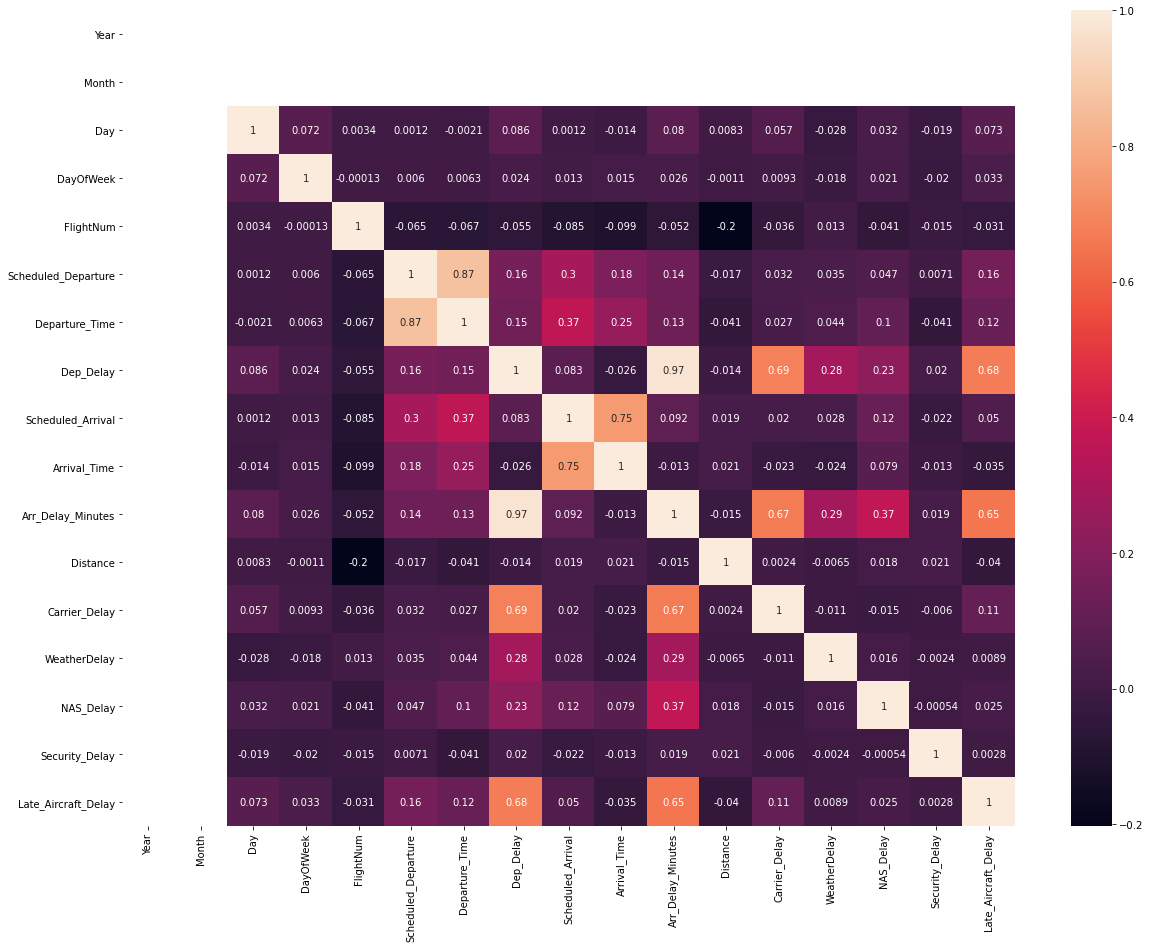

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Dep_Delay and Arr_Delay_Minutes are highly correlated columns and Distance and FlightNum are very less correlated columns

## 8. Show first 10 data

In [19]:
df.head(10)

,Year,Month,Day,DayOfWeek,Flight_Date,Tai_lNum,FlightNum,Origin_Airport,Origin_City_Name,Origin_State,...,Dep_Delay,Scheduled_Arrival,Arrival_Time,Arr_Delay_Minutes,Distance,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
0,2016,7,1,5,01/07/2016,N793AA,1,BOS,"Boston, MA",MA,...,-6,711,707,0,187,0,0,0,0,0
1,2016,7,2,6,02/07/2016,N784AA,1,BOS,"Boston, MA",MA,...,-6,711,703,0,187,0,0,0,0,0
2,2016,7,4,1,04/07/2016,N785AA,1,BOS,"Boston, MA",MA,...,1,711,706,0,187,0,0,0,0,0
3,2016,7,5,2,05/07/2016,N790AA,1,BOS,"Boston, MA",MA,...,-4,711,709,0,187,0,0,0,0,0
4,2016,7,6,3,06/07/2016,N799AA,1,BOS,"Boston, MA",MA,...,-8,711,659,0,187,0,0,0,0,0
5,2016,7,7,4,07/07/2016,N786AA,1,BOS,"Boston, MA",MA,...,-5,711,716,5,187,0,0,0,0,0
6,2016,7,8,5,08/07/2016,N787AA,1,BOS,"Boston, MA",MA,...,-4,711,705,0,187,0,0,0,0,0
7,2016,7,9,6,09/07/2016,N788AA,1,BOS,"Boston, MA",MA,...,-4,711,710,0,187,0,0,0,0,0
8,2016,7,11,1,11/07/2016,N799AA,1,BOS,"Boston, MA",MA,...,-5,711,701,0,187,0,0,0,0,0
9,2016,7,12,2,12/07/2016,N798AA,1,BOS,"Boston, MA",MA,...,-11,711,722,11,187,0,0,0,0,0


## 9. Show last 10 data

In [20]:
df.tail(10)

,Year,Month,Day,DayOfWeek,Flight_Date,Tai_lNum,FlightNum,Origin_Airport,Origin_City_Name,Origin_State,...,Dep_Delay,Scheduled_Arrival,Arrival_Time,Arr_Delay_Minutes,Distance,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
4811,2016,7,16,6,16/07/2016,N3DWAA,146,LAX,"Los Angeles, CA",CA,...,-5,1652,1630,0,2611,0,0,0,0,0
4812,2016,7,17,7,17/07/2016,N3KXAA,146,LAX,"Los Angeles, CA",CA,...,138,1652,1855,123,2611,123,0,0,0,0
4813,2016,7,18,1,18/07/2016,N879AA,146,LAX,"Los Angeles, CA",CA,...,-5,1652,1631,0,2611,0,0,0,0,0
4814,2016,7,19,2,19/07/2016,N889AA,146,LAX,"Los Angeles, CA",CA,...,7,1652,1704,12,2611,0,0,0,0,0
4815,2016,7,20,3,20/07/2016,N878AA,146,LAX,"Los Angeles, CA",CA,...,-4,1652,1648,0,2611,0,0,0,0,0
4816,2016,7,21,4,21/07/2016,N892AA,146,LAX,"Los Angeles, CA",CA,...,30,1652,1728,36,2611,30,0,6,0,0
4817,2016,7,22,5,22/07/2016,N855AA,146,LAX,"Los Angeles, CA",CA,...,-4,1652,1626,0,2611,0,0,0,0,0
4818,2016,7,24,7,24/07/2016,N3AVAA,146,LAX,"Los Angeles, CA",CA,...,-6,1652,1619,0,2611,0,0,0,0,0
4819,2016,7,25,1,25/07/2016,N886AA,146,LAX,"Los Angeles, CA",CA,...,-4,1652,1709,17,2611,0,0,17,0,0
4820,2016,7,26,2,26/07/2016,N874AA,146,LAX,"Los Angeles, CA",CA,...,90,1652,1819,87,2611,87,0,0,0,0


## 10. Show the count of  Origin Airport. 

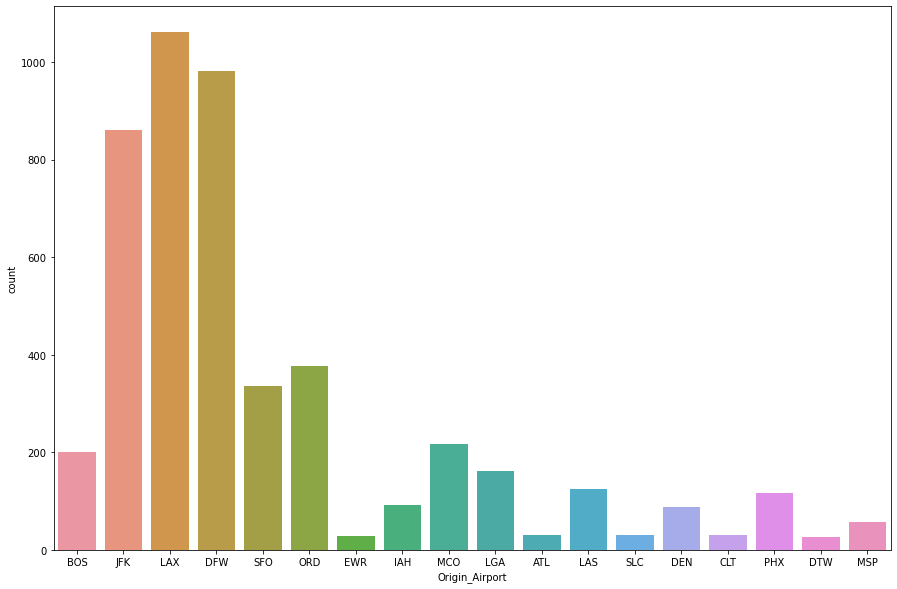

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Origin_Airport'])
plt.show()

### LAX origin airport has most numbers of airports and DTW origin airport has least numbers of airports

## 11. Check the difference between arrival time and departure time for flight number 279 of 8 july 2016

In [22]:
a_d=df[(df['Flight_Date']=='08/07/2016') & (df['FlightNum']==279)]
(a_d['Arrival_Time'])-(a_d['Departure_Time'])

3373    365
dtype: int64

### Difference between arrival time and departure time for flight number 279 of 8 july 2016 is 365 minutes.

## 12. Show the Correlation between Scheduled_Departure time and Scheduled_Arrival time

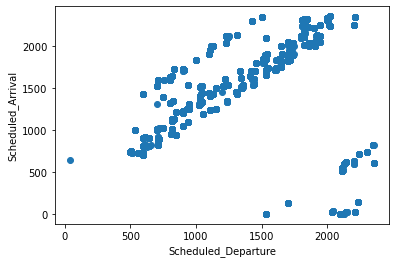

In [23]:
plt.scatter(df['Scheduled_Departure'],df['Scheduled_Arrival']) 
plt.xlabel('Scheduled_Departure')
plt.ylabel('Scheduled_Arrival')
plt.show()

### Scheduled departure time is increasing w.r.t. Scheduled arrival time as it show upward positive direction.

## 13. What are the arrival time and delay arrival time for 5th day of week

In [24]:
print("Arrival Delay Time for 5th days of week\n",df[df['DayOfWeek']==5]['Arr_Delay_Minutes'])
print("\nArrival Time for 5th days of week\n",df[df['DayOfWeek']==5]['Arrival_Time'])

Arrival Delay Time for 5th days of week
 0         0
6         0
12        8
18        0
22        0
       ... 
4793      0
4796     16
4803    101
4810    284
4817      0
Name: Arr_Delay_Minutes, Length: 779, dtype: int64

Arrival Time for 5th days of week
 0        707
6        705
12       719
18       706
22       707
        ... 
4793     654
4796    1708
4803    1833
4810    2136
4817    1626
Name: Arrival_Time, Length: 779, dtype: int64


## 14. Check the total number of flights which are affected by weather

In [25]:
df[df['WeatherDelay']!=0]['FlightNum'].count()

100

### 100 flights are affected by weather

## 15. Get the data affected by carrier_delay

In [26]:
df[df['Carrier_Delay']!=0]

,Year,Month,Day,DayOfWeek,Flight_Date,Tai_lNum,FlightNum,Origin_Airport,Origin_City_Name,Origin_State,...,Dep_Delay,Scheduled_Arrival,Arrival_Time,Arr_Delay_Minutes,Distance,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
11,2016,7,14,4,14/07/2016,N790AA,1,BOS,"Boston, MA",MA,...,40,711,752,41,187,40,0,1,0,0
17,2016,7,21,4,21/07/2016,N790AA,1,BOS,"Boston, MA",MA,...,105,711,858,107,187,105,0,2,0,0
19,2016,7,23,6,23/07/2016,N791AA,1,BOS,"Boston, MA",MA,...,21,711,740,29,187,21,0,8,0,0
23,2016,7,30,6,30/07/2016,N787AA,1,BOS,"Boston, MA",MA,...,48,711,821,70,187,48,0,22,0,0
28,2016,7,5,2,05/07/2016,N786AA,1,JFK,"New York, NY",NY,...,44,1138,1159,21,2475,21,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,2016,7,14,4,14/07/2016,N871AA,146,LAX,"Los Angeles, CA",CA,...,15,1652,1714,22,2611,15,0,7,0,0
4810,2016,7,15,5,15/07/2016,N884AA,146,LAX,"Los Angeles, CA",CA,...,294,1652,2136,284,2611,284,0,0,0,0
4812,2016,7,17,7,17/07/2016,N3KXAA,146,LAX,"Los Angeles, CA",CA,...,138,1652,1855,123,2611,123,0,0,0,0
4816,2016,7,21,4,21/07/2016,N892AA,146,LAX,"Los Angeles, CA",CA,...,30,1652,1728,36,2611,30,0,6,0,0


### 816 records of data got affected by carrier delay

## 16. Plot the states with respect to arrival delay time

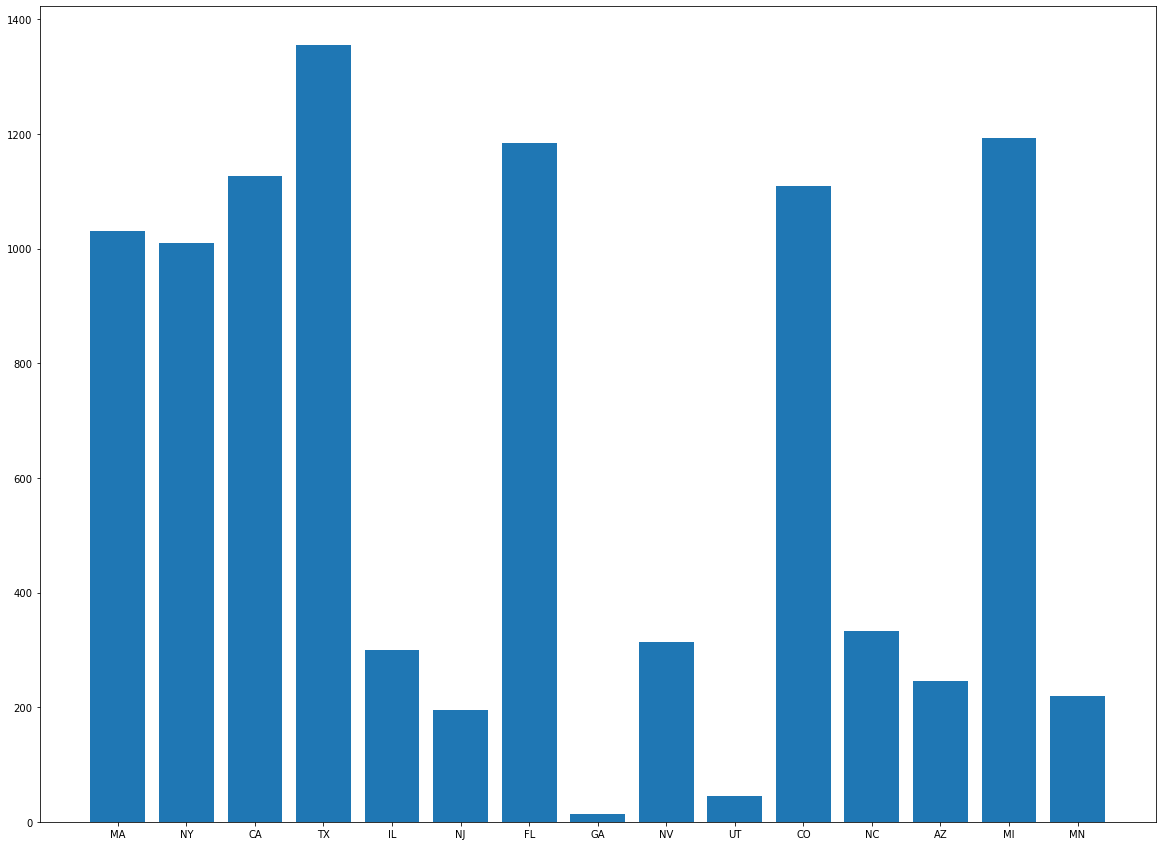

In [27]:
plt.figure(figsize=(20,15))
plt.bar(df['Origin_State'],df['Arr_Delay_Minutes'])
plt.show()

### TX state has most arrival delay time and GA state has least arrival delay time

## 17. How many number of airports are there in Boston, MA

In [28]:
df[df['Origin_City_Name']=='Boston, MA']

,Year,Month,Day,DayOfWeek,Flight_Date,Tai_lNum,FlightNum,Origin_Airport,Origin_City_Name,Origin_State,...,Dep_Delay,Scheduled_Arrival,Arrival_Time,Arr_Delay_Minutes,Distance,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
0,2016,7,1,5,01/07/2016,N793AA,1,BOS,"Boston, MA",MA,...,-6,711,707,0,187,0,0,0,0,0
1,2016,7,2,6,02/07/2016,N784AA,1,BOS,"Boston, MA",MA,...,-6,711,703,0,187,0,0,0,0,0
2,2016,7,4,1,04/07/2016,N785AA,1,BOS,"Boston, MA",MA,...,1,711,706,0,187,0,0,0,0,0
3,2016,7,5,2,05/07/2016,N790AA,1,BOS,"Boston, MA",MA,...,-4,711,709,0,187,0,0,0,0,0
4,2016,7,6,3,06/07/2016,N799AA,1,BOS,"Boston, MA",MA,...,-8,711,659,0,187,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,2016,7,26,2,26/07/2016,N3JNAA,40,BOS,"Boston, MA",MA,...,3,2058,2116,18,867,3,0,15,0,0
3681,2016,7,27,3,27/07/2016,N3LBAA,40,BOS,"Boston, MA",MA,...,13,2058,2119,21,867,13,0,8,0,0
3682,2016,7,29,5,29/07/2016,N3GWAA,40,BOS,"Boston, MA",MA,...,100,2058,2302,124,867,0,0,24,0,100
3683,2016,7,30,6,30/07/2016,N3LPAA,40,BOS,"Boston, MA",MA,...,33,2058,2115,17,867,8,0,0,0,9


In [29]:
df[df['Origin_City_Name']=='Boston, MA']['Origin_Airport'].count()

201

### Airports in boston MA are 201

## 18. Check data where distance is greater than 1000 and check total numbers of data.

In [30]:
df[df['Distance']>1000]

,Year,Month,Day,DayOfWeek,Flight_Date,Tai_lNum,FlightNum,Origin_Airport,Origin_City_Name,Origin_State,...,Dep_Delay,Scheduled_Arrival,Arrival_Time,Arr_Delay_Minutes,Distance,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
24,2016,7,1,5,01/07/2016,N797AA,1,JFK,"New York, NY",NY,...,16,1138,1200,22,2475,0,0,6,0,16
25,2016,7,2,6,02/07/2016,N791AA,1,JFK,"New York, NY",NY,...,1,1138,1138,0,2475,0,0,0,0,0
26,2016,7,3,7,03/07/2016,N790AA,1,JFK,"New York, NY",NY,...,0,1138,1135,0,2475,0,0,0,0,0
27,2016,7,4,1,04/07/2016,N785AA,1,JFK,"New York, NY",NY,...,-3,1138,1122,0,2475,0,0,0,0,0
28,2016,7,5,2,05/07/2016,N786AA,1,JFK,"New York, NY",NY,...,44,1138,1159,21,2475,21,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,2016,7,21,4,21/07/2016,N892AA,146,LAX,"Los Angeles, CA",CA,...,30,1652,1728,36,2611,30,0,6,0,0
4817,2016,7,22,5,22/07/2016,N855AA,146,LAX,"Los Angeles, CA",CA,...,-4,1652,1626,0,2611,0,0,0,0,0
4818,2016,7,24,7,24/07/2016,N3AVAA,146,LAX,"Los Angeles, CA",CA,...,-6,1652,1619,0,2611,0,0,0,0,0
4819,2016,7,25,1,25/07/2016,N886AA,146,LAX,"Los Angeles, CA",CA,...,-4,1652,1709,17,2611,0,0,17,0,0


In [31]:
df[df['Distance']>1000]['Distance'].count()

3029

### Total number of data whose distance is greater than 1000 = 3029

## 19. Numbers of Airports in each origin airports

In [32]:
df['Origin_Airport'].value_counts()

LAX    1061
DFW     982
JFK     860
ORD     377
SFO     336
MCO     218
BOS     201
LGA     162
LAS     125
PHX     117
IAH      91
DEN      87
MSP      57
SLC      31
ATL      31
CLT      30
EWR      29
DTW      26
Name: Origin_Airport, dtype: int64

## 20. Show an useful plot for above question

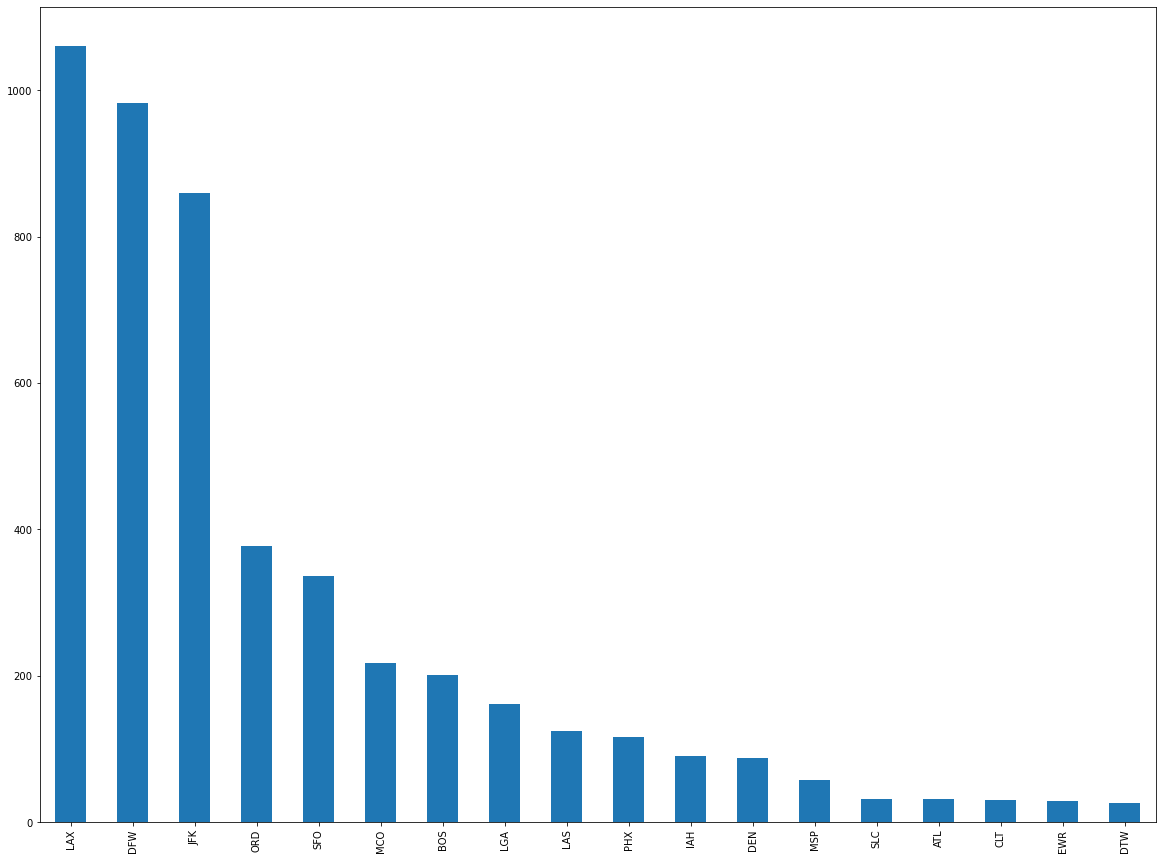

In [33]:
plt.figure(figsize=(20,15))
df['Origin_Airport'].value_counts().plot(kind='bar')
plt.show()

### BAR plot is useful for above problem

## 21. Top 5 Airports with respect to highest number of airports

In [34]:
df['Origin_Airport'].value_counts()[:5]

LAX    1061
DFW     982
JFK     860
ORD     377
SFO     336
Name: Origin_Airport, dtype: int64

### LAX,DFW,JFK,ORD,SFO are top 5 airports w.r.t. highest number of airports.

## 22. Top 5 States with respect to lowest distance(from low to high)

In [35]:
df.groupby('Origin_State')['Distance'].min().sort_values()[:5]

Origin_State
MA    187
NY    187
FL    192
CA    236
NV    236
Name: Distance, dtype: int64

### MA,NY,FL,CA,NV are top 5 states w.r.t. lowest distance

## 23. Show how many percentage of states aquired the airports

<AxesSubplot:ylabel='Origin_State'>

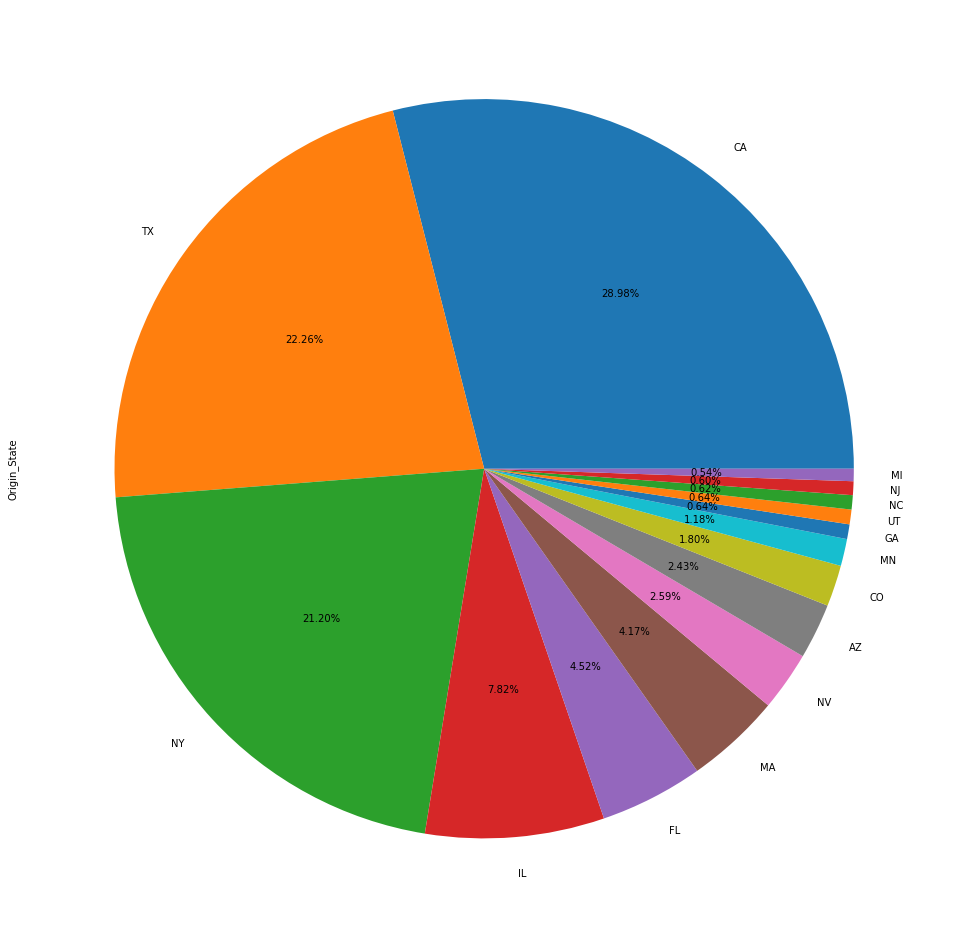

In [36]:
plt.figure(figsize=(17,17))
df['Origin_State'].value_counts().plot(kind="pie",autopct="%.2f%%")

### Most of the airports aquired by NY=21.20% ,TX=22.26% ,CA=28.98%

## 24. What are flight numbers of plan having tail number 'N564AA'

In [38]:
df[df['Tai_lNum']=='N564AA']

,Year,Month,Day,DayOfWeek,Flight_Date,Tai_lNum,FlightNum,Origin_Airport,Origin_City_Name,Origin_State,...,Dep_Delay,Scheduled_Arrival,Arrival_Time,Arr_Delay_Minutes,Distance,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
2705,2016,7,30,6,30/07/2016,N564AA,168,ORD,"Chicago, IL",IL,...,145,1811,2025,134,646,5,0,0,0,129
3020,2016,7,17,7,17/07/2016,N564AA,181,DFW,"Dallas/Fort Worth, TX",TX,...,-5,1836,1820,0,802,0,0,0,0,0


In [39]:
df[df['Tai_lNum']=='N564AA']['FlightNum']

2705    168
3020    181
Name: FlightNum, dtype: int64

### Flight numbers 168 and 181 are having tail number 'N564AA'